# Movie Review Text Classification
### Classifying Positive and Negative Reviews with NLP

**Author**: Miguel Santana

Thank you for reviewing this repository. The author's contact info, sources and social media profiles are listed below under **further information.**

The contents of this repository detail an analysis of 6000 movie reviews of which 3000 are positive and 3000 are negative. In this particular case, the text has been preprocessed and the labels are provided in order to assess performance. The analysis will provide insight into method's used by NLP professionals to evaluate text for businesses.

#### Project Framework | OSEMN

**Data processing and analysis is completed using the OSEMN framework. The structure includes: Obtaining the data, Scrubbing (Processing), Exploratory Data Analysis, Statistical Modeling and Interpretation of the Results.**

#### The Data

The dataset is originally sourced from Stanford Artificial Intelligence Laboratory (SAIL) but was provided via Udemy. The Udemy citation is available below under **sources.** Please visit [ai.stanford.edu](http://ai.stanford.edu/~amaas/data/sentiment/) for more information on this dataset. 

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')

In [2]:
# Modeling Packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

# Import Data

In [3]:
df = pd.read_csv('moviereviews.tsv',sep='\t')

print(df.info())
print('\n')
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   6000 non-null   object
 1   review  5980 non-null   object
dtypes: object(2)
memory usage: 93.9+ KB
None




,label,review
0,pos,I loved this movie and will watch it again. Or...
1,pos,"A warm, touching movie that has a fantasy-like..."
2,pos,I was not expecting the powerful filmmaking ex...
3,neg,"This so-called ""documentary"" tries to tell tha..."
4,pos,This show has been my escape from reality for ...


In [4]:
print(f'There are {len(df)} movie reviews in this dataset.')

There are 6000 movie reviews in this dataset.


# Scrubbing | Data Cleaning
### Whitespace Strings

In [5]:
# checking whitespace strings
blanks = []

# iterate through / check missing
for ind,label,review in df.itertuples():
    if type(review) == str: # if string
        if review.isspace(): # check if whitespace
            blanks.append(ind) # append index position

In [6]:
# whitespace strings
print(f'There are {len(blanks)} whitespace strings in the dataset.')

There are 0 whitespace strings in the dataset.


In [7]:
# # drop whitespace strings
# df.drop(blanks,inplace=True)

### Null Values

In [8]:
df.isnull().sum()

label      0
review    20
dtype: int64

In [9]:
# drop null values
df.dropna(inplace=True)

# Exploratory Data Analysis
#### Check Distribution of Classes

In [10]:
df['label'].value_counts()

pos    2990
neg    2990
Name: label, dtype: int64

<div class="alert alert-block alert-info">

The dataset has an even distribution of positive and negative reviews. This makes accuracy a great metric for our model analysis.

</div>

### Length of Reviews

In [11]:
# review length
df['review length'] = df['review'].apply(len)

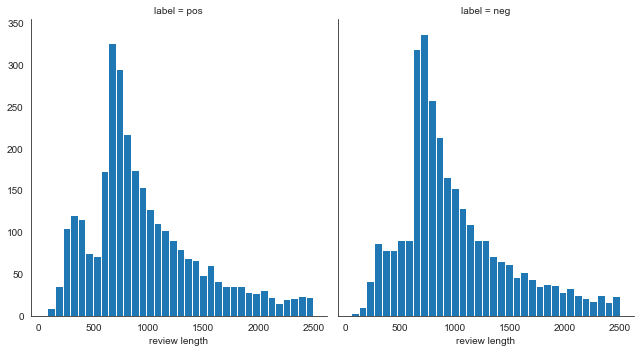

In [12]:
# facet grid - text length 
g = sns.FacetGrid(df,col='label',height=5,aspect=.9)
g.map(plt.hist,'review length',bins=35);
# g.savefig('lengthofreviews.jpg',dpi=200,bbox_inches='tight')

<div class="alert alert-block alert-info">

The distribution of review lengths is approximately the same for negative and positive reviews.

</div>

### Positive vs. Negative

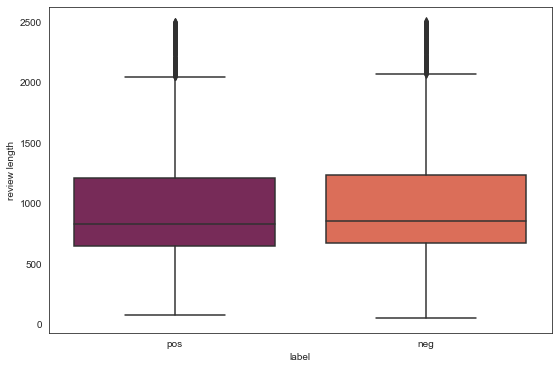

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(9,6)
sns.boxplot(x='label',y='review length',data=df,palette='rocket');
# fig.savefig('positivenegativelength.jpg',dpi=200,bbox_inches='tight')

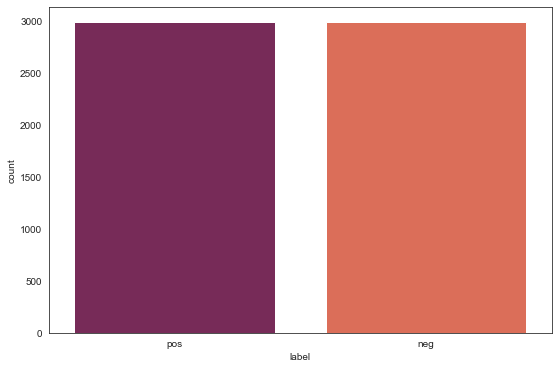

In [14]:
# number of occurances per pos/neg
fig, ax = plt.subplots()
fig.set_size_inches(9,6)
sns.countplot(x='label',data=df,palette='rocket');
# fig.savefig('countposneg.jpg',dpi=200,bbox_inches='tight')

## Model Preparation
### Separating Features & Target 

In [15]:
# feature and target variable
X = df['review'] # feature
y = df['label'] # target

In [16]:
cv = CountVectorizer() # instantiate
# fit transform X
X = cv.fit_transform(X) # fit the model

### Test | Train Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Preparing for Visualizations

In [18]:
def model_visuals (model, X_test, y_test):
    '''Plots the confusion matrix and ROC-AUC plot'''
    fig, axes = plt.subplots(figsize = (12, 6), ncols = 2)  # confusion matrix
    metrics.plot_confusion_matrix(model, X_test, y_test, normalize = 'true', 
                          cmap = 'Blues', ax = axes[0])
    axes[0].set_title('Confusion Matrix');
    # ROC-AUC Curve
    roc_auc = metrics.plot_roc_curve(model, X_test, y_test,ax=axes[1])
    axes[1].plot([0,1],[0,1],ls=':')
    axes[1].set_title('ROC-AUC Plot')
    axes[1].grid()
    axes[1].legend()
#     fig.savefig('_modelvis.jpg',dpi=200,bbox_inches='tight')
    fig.tight_layout()
    plt.show()

# Statistical Modeling 
### MultinomialNB Classifier

In [19]:
nb = MultinomialNB() # instantiate
nb.fit(X_train,y_train) # fit the data

MultinomialNB()

#### Predictions and Evaluations

              precision    recall  f1-score   support

         neg       0.90      0.92      0.91       899
         pos       0.92      0.90      0.91       895

    accuracy                           0.91      1794
   macro avg       0.91      0.91      0.91      1794
weighted avg       0.91      0.91      0.91      1794



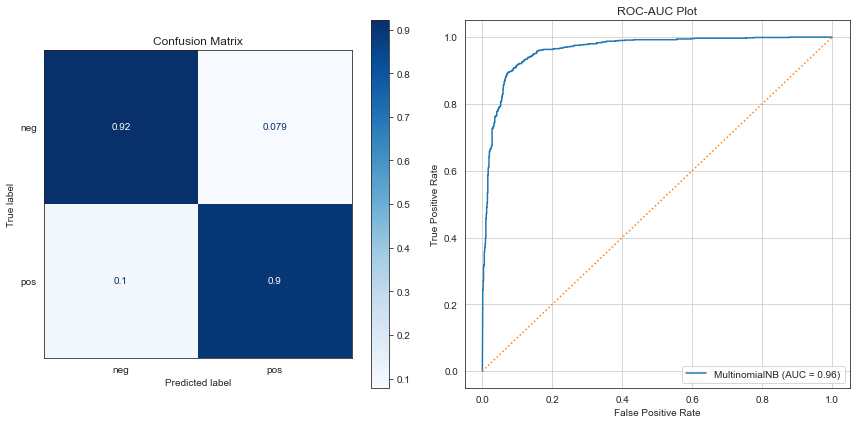



The overall accuracy score is 0.9091415830546266


In [20]:
predictions = nb.predict(X_test)

print(classification_report(y_test,predictions))
model_visuals (nb, X_test, y_test) # class report / plots
print('\n')
# Overall accuracy
acc = accuracy_score(y_test,predictions)
print(f'The overall accuracy score is {acc}')

### LinearSVC Classifier

In [21]:
svc = LinearSVC() # instantiate
svc.fit(X_train,y_train) # fit the data

/Users/miguelsantana/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC()

#### Predictions and Evaluations

              precision    recall  f1-score   support

         neg       0.91      0.90      0.90       899
         pos       0.90      0.91      0.90       895

    accuracy                           0.90      1794
   macro avg       0.90      0.90      0.90      1794
weighted avg       0.90      0.90      0.90      1794



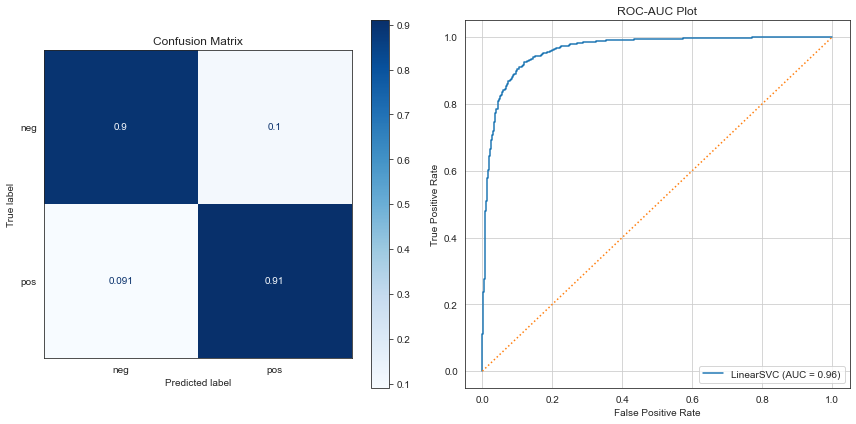



The overall accuracy score is 0.9024526198439242


In [22]:
predictions = svc.predict(X_test)

print(classification_report(y_test,predictions))
model_visuals (svc, X_test, y_test) # class report / plots
print('\n')
# Overall accuracy
acc = accuracy_score(y_test,predictions)
print(f'The overall accuracy score is {acc}')

<div class="alert alert-block alert-info">

Both models did really well. Let's try to improve performance using TF-IDF through a pipeline.

</div>

### Pipeline | TF-IDF
#### Feature Selection | Test Train Split

In [23]:
# feature and target variable / old data already vectorized
X = df['review']
y = df['label']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Final Model

In [25]:
# Creating a pipeline
pipe = Pipeline([
    ('tfidf',TfidfVectorizer()), # vectorize / weighted scores
    ('svc',LinearSVC())]) # fit model

pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

#### Predictions and Evaluations

In [26]:
predictions = pipe.predict(X_test)

print(classification_report(y_test,predictions))
print('\n')
# Overall accuracy
acc = accuracy_score(y_test,predictions)
print(f'The overall accuracy score is {acc}')

              precision    recall  f1-score   support

         neg       0.93      0.91      0.92       899
         pos       0.91      0.94      0.92       895

    accuracy                           0.92      1794
   macro avg       0.92      0.92      0.92      1794
weighted avg       0.92      0.92      0.92      1794



The overall accuracy score is 0.9241917502787068


<div class="alert alert-block alert-info">

The pipeline out performed the first two models but the scores were relatively close.

</div>

# Interpreting Results | Used Cases

The text classifier model was able to predict positive and negative reviews with 92% accuracy. While this dataset is not representative of something that might be seen in a real work environment, (due to the perfect class balance and predetermined labels) the project shows the potential for application in business. In theory, a web scraper could be built to search for movie reviews which could be processed by our classifier to offer additional insight into the overall opinion of a film. 

### Future Work

Future work should include web scraping of additional sources to get a broader view of the classifier's potential with respect to more data from many more sources. In future projects, sentiment analysis in combination with text classification should be applied to these larger and more robust data sets. 

#### Further Information

For any additional questions, please reach out via email at santana2.miguel@gmail.com, on [LinkedIn](https://www.linkedin.com/in/miguel-angel-santana-ii-mba-51467276/) or on [Twitter.](https://twitter.com/msantana_ds)

#### Sources

Additional analysis, notes and file sources can be found on Udemy. 

* Course Name: NLP - Natural Language Processing by Jose Portilla